In [5]:
import numpy as np
import matplotlib.pyplot as plt

### Simple model (forward difference)

In [6]:
S_0 = 0.99
I_0 = 0.01
R_0 = 0
if (S_0 + I_0 + R_0 != 1): print('Invalid initial distribution')

In [7]:
def S(h, beta, S_prev, I_prev):
    return -h*beta*S_prev*I_prev + S_prev

def I(h, beta, gamma, S_prev, I_prev):
    return h*beta*S_prev*I_prev - h*gamma*I_prev + I_prev

def R(h, gamma, I_prev, R_prev):
    return h*gamma*I_prev + R_prev

In [8]:
def iterative_solve(S_0, I_0, R_0, h=0.1, beta=3, gamma=1, steps=100):
    
    # Create arrays to store data
    S_array = np.zeros(steps)
    I_array = np.zeros(steps)
    R_array = np.zeros(steps)
    
    # Set initial values
    S_prev = S_0
    I_prev = I_0
    R_prev = R_0
    
    S_array[0] = S_prev
    I_array[0] = I_prev
    R_array[0] = R_prev
    
    # Find solutions iteratively
    for i in range(1, steps):
        
        # Calculate next step
        S_next = S(h, beta, S_prev, I_prev)
        I_next = I(h, beta, gamma, S_prev, I_prev)
        R_next = R(h, gamma, I_prev, R_prev)
        
        # Store valus
        S_array[i] = S_next
        I_array[i] = I_next
        R_array[i] = R_next
        
        # Shift timeframe
        S_prev = S_next
        I_prev = I_next
        R_prev = R_next
    
    return S_array, I_array, R_array

### Plot Solutions

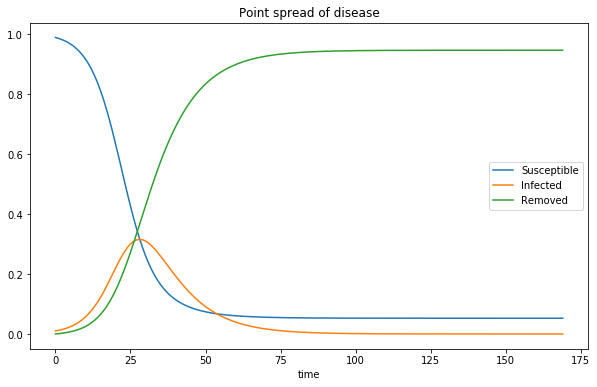

In [9]:
S_array, I_array, R_array = iterative_solve(S_0, I_0, R_0, h=0.1, beta=3, gamma=1, steps=170)

plt.figure(figsize=(10,6))
plt.plot(S_array, label = 'Susceptible')
plt.plot(I_array, label = 'Infected')
plt.plot(R_array, label = 'Removed')
plt.xlabel("time")
plt.title("Point spread of disease")
plt.legend()
plt.savefig("spread1.pdf")
plt.show()

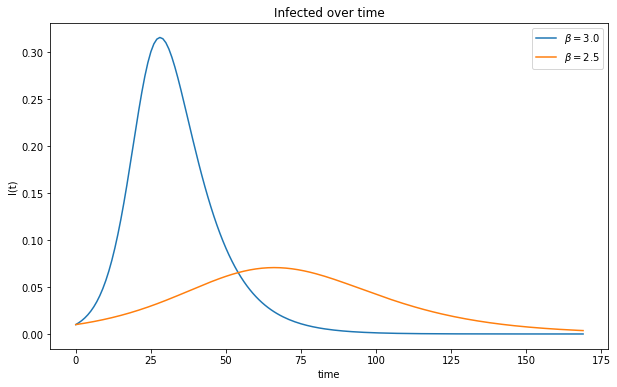

In [10]:
S_array, I_array, R_array = iterative_solve(S_0, I_0, R_0, h=0.1, beta=3, gamma=1, steps=170)
S_array2, I_array2, R_array2 = iterative_solve(S_0, I_0, R_0, h=0.1, beta=1.5, gamma=1, steps=170)

plt.figure(figsize=(10,6))
plt.plot(I_array, label = r'$\beta = 3.0$')
plt.plot(I_array2, label = r'$\beta = 2.5$')
plt.title("Infected over time")
plt.xlabel("time")
plt.ylabel("I(t)")
plt.legend()
plt.savefig("Infection1.pdf")
plt.show()

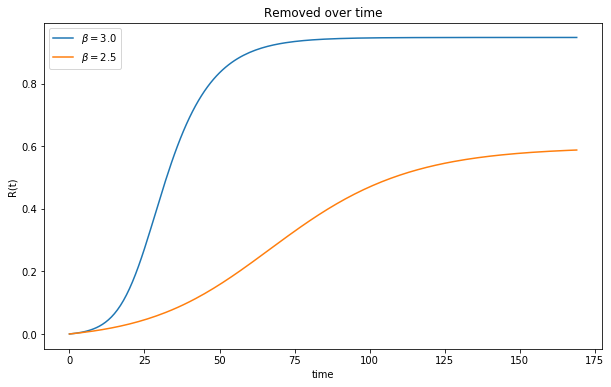

In [11]:
plt.figure(figsize=(10,6))
plt.plot(R_array, label = r'$\beta = 3.0$')
plt.plot(R_array2, label = r'$\beta = 2.5$')
plt.title("Removed over time")
plt.xlabel("time")
plt.ylabel("R(t)")
plt.legend()
plt.savefig("Removed1.pdf")
plt.show()

In [12]:
print(S_array + I_array + R_array)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


### Solutions in (x, t)

In [13]:
from scipy.linalg import solve

In [14]:
# Explicit solver


def laplace(M, i, j, n):
    if (j == 0):
        return M[i-1, j] - 2*M[i-1, j+1] + M[i-1, j+2]
    elif (j == n-1):
         return M[i-1, j-2] - 2*M[i-1, j-1] + M[i-1, j]
    else:
        return M[i-1, j+1] - 2*M[i-1, j] + M[i-1, j-1]



def explicit_solve(S_x0, I_x0, R_x0, h, k, mu_s, mu_i, beta, gamma, steps=100):
    
    n = S_x0.size
    
    S = np.zeros((steps, n))
    I = np.zeros((steps, n))
    R = np.zeros((steps, n))
    
    print(S.shape)
    
    S[0, :] = S_x0
    I[0, :] = I_x0
    R[0, :] = R_x0

    a = h/k**2
    
    for i in range(1, steps):
        
        for j in range(n):
            
            S_temp = S[i-1, j]*(1-h*beta*I[i-1, j]) + mu_s*a*laplace(S, i, j, n)
            I_temp = I[i-1, j]*(1+h*beta*S[i-1, j]-h*gamma) + mu_i*a*laplace(I, i, j, n)
            R_temp = R[i-1, j] + h*gamma*I[i-1, j]
            
            total = S_temp + I_temp + R_temp
            
            S[i, j] = S_temp/total
            I[i, j] = I_temp/total
            R[i, j] = R_temp/total
            
    return S, I, R
            

In [46]:
# Crank-Nicholson solver


def Sz(m):
    s = np.eye(m, k=-1) - 2*np.eye(m, k=0) + np.eye(m, k=1)
    
    # Add Neumann boundary conditions
    s[0, :2] = [-2, 2]
    s[-1, -2:] = [2, -2]
    return s
    
def Az(m, r):
    return np.eye(m) - (r/2)*S(m)

def Bz(m, r):
    return np.eye(m) + (r/2)*S(m)
    


def crank_nicholsen_x(S_x0, I_x0, R_x0, h, k, mu_s, mu_i, beta, gamma, n=0, m=0):
    
    
    # Set parameters
    m = S_x0.size
    r_s = mu_s*k/h**2
    r_i = mu_i*k/h**2
    
    
    # Define matrices for implicit step
    A_s = A(m, r_s)
    A_i = A(m, r_i)
    
    B_s = B(m, r_s)
    B_i = B(m, r_i)
    
    
    # Initialize solution matrices
    S = np.zeros((n, m))
    I = np.zeros((n, m))
    R = np.zeros((n, m))
    
    print(S.shape)
    
    # Initialize start distributions
    S[0, :] = S_x0
    I[0, :] = I_x0
    R[0, :] = R_x0
    
    
    # Solve iteratively over time using Crank-Nicholsen modification
    for i in range(1, n):
        
        # Define b-vector for implicit step
        b_s = B_s.dot(S[i-1, :]) - k*beta*S[i-1, :]*I[i-1, :]
        b_i = B_i.dot(I[i-1, :]) + (beta*S[i-1, :]-gamma)*k*I[i-1, :]
        
        # Solve implicit steps
        S_hat = solve(A_s, b_s)
        I_hat = solve(A_i, b_i)
        
        # Solve explicit time steps
        S[i, :] = S_hat + (-beta*k/2)*I[i-1, :]*(S_hat-S[i-1, :])
        I[i, :] = I_hat + (k/2)*(I_hat-I[i-1, :])*(beta*S[i-1, :]-gamma)
        R[i, :] = R[i-1, :] + k*gamma*I[i-1, :]
        
        
    return S, I, R

In [19]:
# -*- PARAMETERS -*-


n = 400      # Number of timesteps 
m = 100      # Number of x-steps

k = 0.05      # Stepsize in t
h = 0.5        # Stepsize in x


# Initial distributions
S_x0 = np.ones(m)
S_x0[30] = 0.99
I_x0 = np.ones(m) - S_x0
R_x0 = np.zeros(m)

if (round(S_x0.sum() + I_x0.sum() + R_x0.sum(), 2) != 1.00*m):
    print("Error. Not a valid distribution.")

    
# Hyper parameters

mu_s = 1.0     # Movement speed among susceptible
mu_i = 1.0     # Movement speed among infected

beta = 3.0     # Transfer ratio S -> I
gamma = 1.0    # Transfer ratio I -> R

In [20]:
S, I, R = crank_nicholsen_x(S_x0, I_x0, R_x0, h, k, mu_s, mu_i, beta, gamma, n=n, m=m)

(400, 100)


Text(0.5, 1.0, 'Removed')

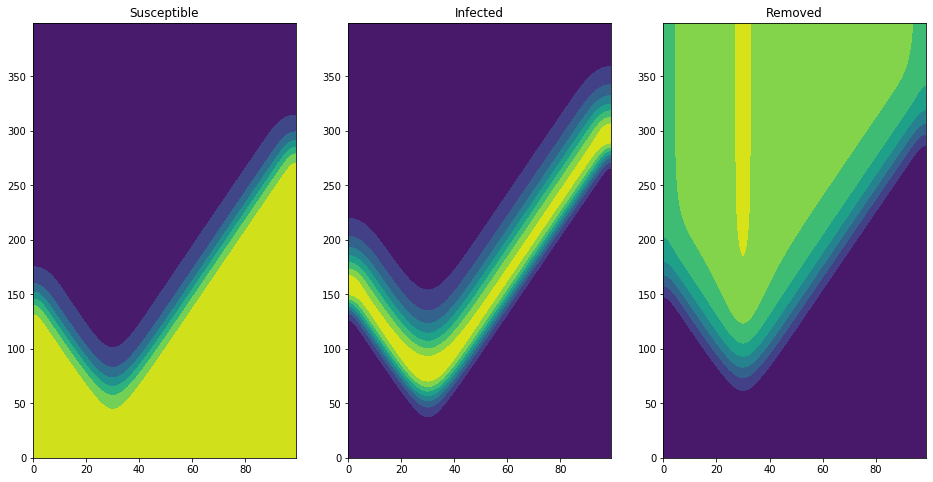

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(16, 8))
ax[0].contourf(S)
ax[0].set_title('Susceptible')
ax[1].contourf(I)
ax[1].set_title('Infected')
ax[2].contourf(R)
ax[2].set_title('Removed')
#ax.xlabel('Location')
#ax[0].ylabel('Time')

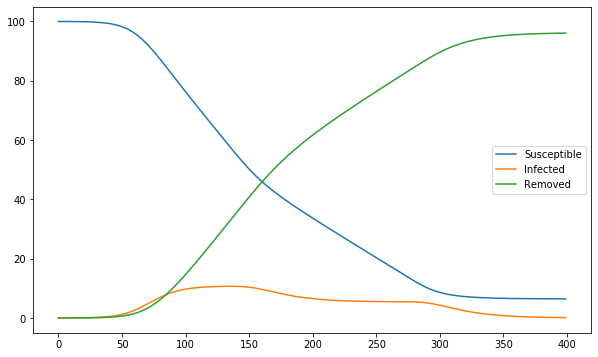

In [32]:
plt.figure(figsize=(10,6))
plt.plot(S.sum(axis=1), label = 'Susceptible')
plt.plot(I.sum(axis=1), label = 'Infected')
plt.plot(R.sum(axis=1), label = 'Removed')
plt.legend()
plt.show()

In [45]:
plt.figure(figsize=(10,6))
plt.plot(S.sum(axis=1), label = 'Has not had disease')
plt.plot((I.sum(axis=1) + R.sum(axis=1)), label = 'Has had disease')
plt.legend()
plt.show()

AttributeError: 'function' object has no attribute 'sum'

<Figure size 720x432 with 0 Axes>

In [44]:
(I.sum(axis=1)+S.sum(axis=1)+R.sum(axis=1))/100

AttributeError: 'int' object has no attribute 'sum'

### Solutions in (x, y, t)

In [130]:
# Help functions

def S(M, M2):
    
    # Fill inn diagonals for 4-point formula
    sp = np.eye(M2, k=0)
    se = np.eye(M2, k=1)
    sw = np.eye(M2, k=-1)
    ss = np.eye(M2, k=M)
    sn = np.eye(M2, k=-M)
    
    
    # Include Dirichlet boundary conditions dU/dt = 0
    
    # North border
    indice_n = np.arange(0, M)
    #sn[indice_n] = 0
    ss[indice_n, indice_n + M] = 2
    
    # West border
    indice_w = np.arange(0, M2, M)
    sw[indice_w[1:], indice_w[1:]-1] = 0
    se[indice_w, indice_w+1] = 2
    
    # South border
    indice_s = np.arange(M2-M, M2)
    #ss[indice_s] = 0
    sn[indice_s, indice_s-M] = 2
    
    # East border
    indice_e = np.arange(M-1, M2, M)
    se[indice_e[:-1], indice_e[:-1]+1] = 0
    sw[indice_e, indice_e-1] = 2
    
    
    return se + sw + ss + sn - 4*sp
    
    
    
def A(M, M2, r):
    return np.eye(M2) - (r/2)*S(M, M2)


def B(M, M2, r):
    return np.eye(M2) + (r/2)*S(M, M2)
    
    
    

# Modified Crank-Nicholson Scheme    
    
def crank_nicholsen(S0, I0, R0, h, k, mu_s, mu_i, beta, gamma, N=0, M=0):
    
    
    M2 = M**2
    
    # Set parameters
    r_s = mu_s*k/h**2
    r_i = mu_i*k/h**2
    
    
    # Define matrices for implicit step
    A_s = A(M, M2, r_s)
    A_i = A(M, M2, r_i)
    
    B_s = B(M, M2, r_s)
    B_i = B(M, M2, r_i)
    
    
    # Initialize solution matrices
    S = np.zeros((N, M, M))
    I = np.zeros((N, M, M))
    R = np.zeros((N, M, M))
    
    print(S.shape)
    
    # Initialize start distributions
    S[0, :, :] = S0
    I[0, :, :] = I0
    R[0, :, :] = R0
    
    
    # Solve iteratively over time using Crank-Nicholsen modification
    for i in range(1, N):
        
        if (i%10 == 0):
            print(f"Time step nr. {i}")
        
        # Flatten prev time matrix to vector
        S_prev = S[i-1, :, :].flatten()
        I_prev = I[i-1, :, :].flatten()
        R_prev = R[i-1, :, :].flatten()
        
        # Define b-vector for implicit step
        b_s = B_s.dot(S_prev) - k*beta*S_prev*I_prev
        b_i = B_i.dot(I_prev) + (beta*S_prev-gamma)*k*I_prev
        
        # Solve implicit steps
        S_hat = solve(A_s, b_s)
        I_hat = solve(A_i, b_i)
        
        # Solve explicit time steps
        S_next = S_hat + (-beta*k/2)*I_prev*(S_hat-S_prev)
        I_next = I_hat + (k/2)*(I_hat-I_prev)*(beta*S_prev-gamma)
        R_next = R_prev + k*gamma*I_prev
        
        # Reshape time step vector to matrix
        S[i, :, :] = S_next.reshape((M, M))
        I[i, :, :] = I_next.reshape((M, M))
        R[i, :, :] = R_next.reshape((M, M))
        
        
    return S, I, R

In [131]:
# -*- PARAMETERS -*-


N = 100      # Number of timesteps 
M = 10      # Number of gridpoints in x and y directions

k = 0.1      # Stepsize in t
h = 1.0      # Stepsize in x and y


# Initial distributions
S0 = np.ones((M, M))
S0[3, 3] = 0.99
I0 = np.ones((M, M)) - S0
R0 = np.zeros((M, M))

if (round(S0.sum().sum() + I0.sum().sum() + R0.sum().sum(), 2) != 1.00*M*M):
    print("Error. Not a valid distribution.")

    
# Hyper parameters

mu_s = 1.0     # Movement speed among susceptible
mu_i = 1.0     # Movement speed among infected

beta = 3.0     # Transfer ratio S -> I
gamma = 1.0    # Transfer ratio I -> R

In [132]:
# Make grid
x = np.linspace(0, 1, M+1)
y = np.linspace(0, 1, M+1) 
X, Y = np.meshgrid(x, y)
M2 = M**2

In [133]:
%timeit
S, I, R = crank_nicholsen(S0, I0, R0, h, k, mu_s, mu_i, beta, gamma, N=N, M=M)

(100, 10, 10)
Time step nr. 10
Time step nr. 20
Time step nr. 30
Time step nr. 40
Time step nr. 50
Time step nr. 60
Time step nr. 70
Time step nr. 80
Time step nr. 90


In [134]:
def plot_at_t(S, I, R, t):
    
    S = S[t, :, :]
    I = I[t, :, :]
    R = R[t, :, :]
    
    fig, ax = plt.subplots(1, 3, figsize=(24, 8))
    ax[0].contourf(S)
    ax[0].set_title('Susceptible')
    ax[1].contourf(I)
    ax[1].set_title('Infected')
    ax[2].contourf(R)
    ax[2].set_title('Removed')
    #ax.xlabel('Location')
    #ax[0].ylabel('Time')
    
    plt.show()

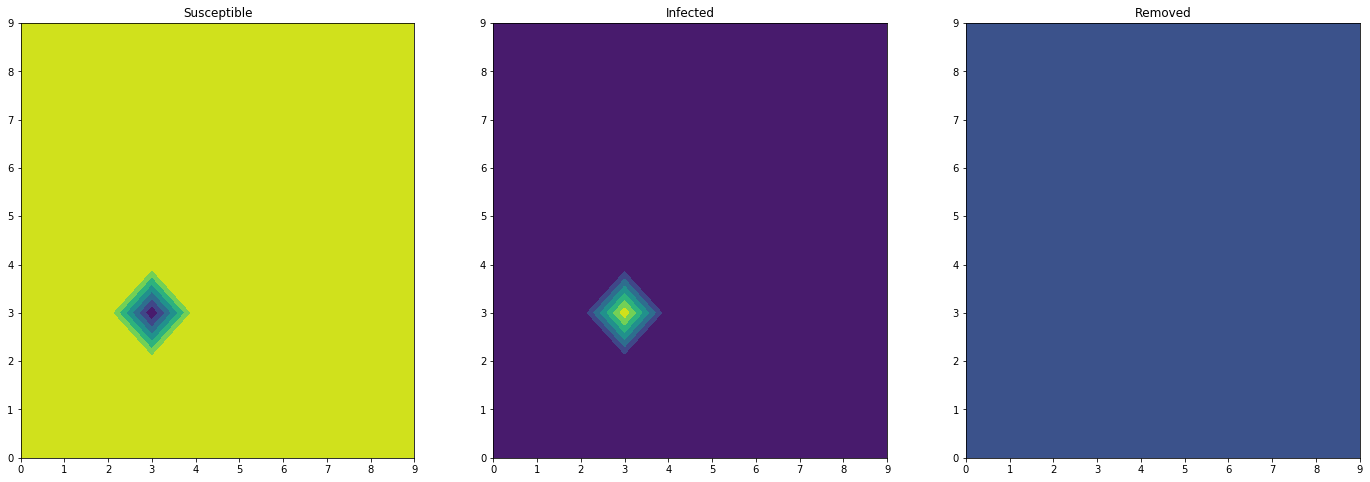

In [135]:
plot_at_t(S, I, R, 0)

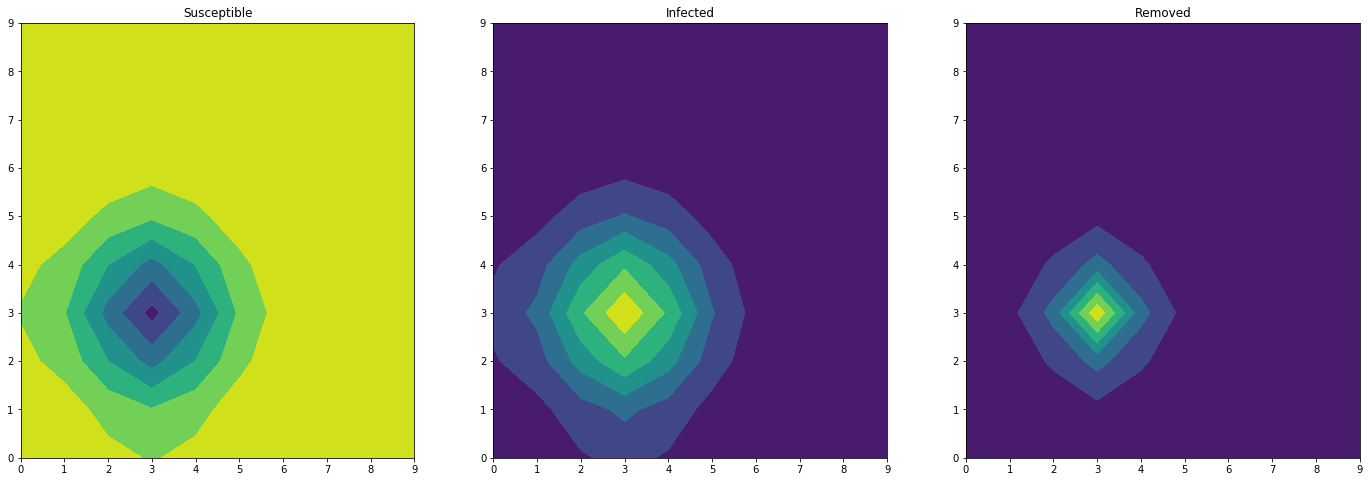

In [136]:
plot_at_t(S, I, R, 10)

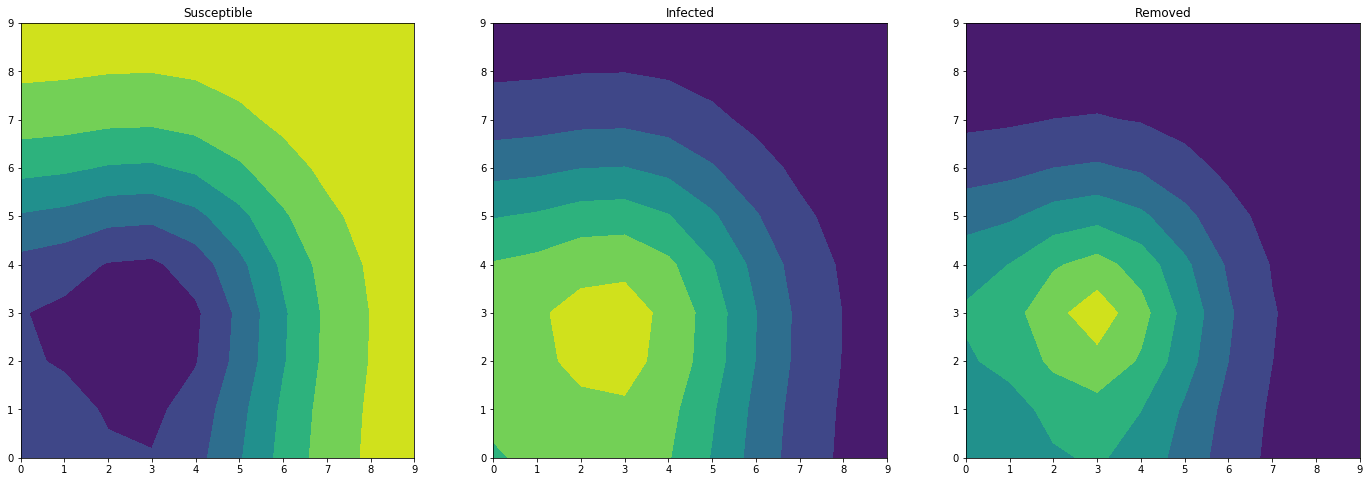

In [137]:
plot_at_t(S, I, R, 30)

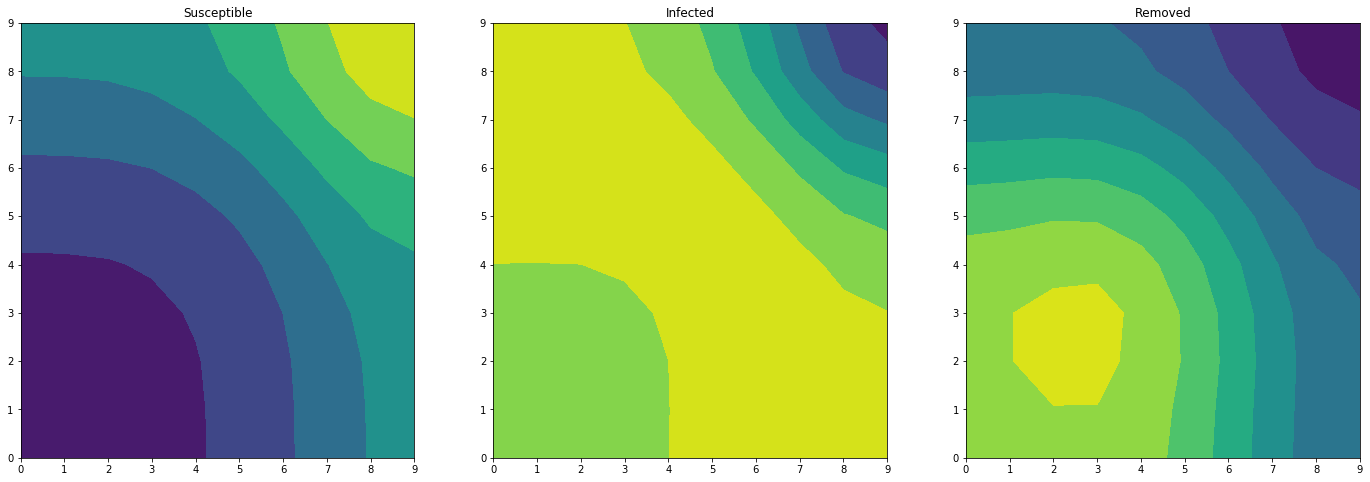

In [138]:
plot_at_t(S, I, R, 50)

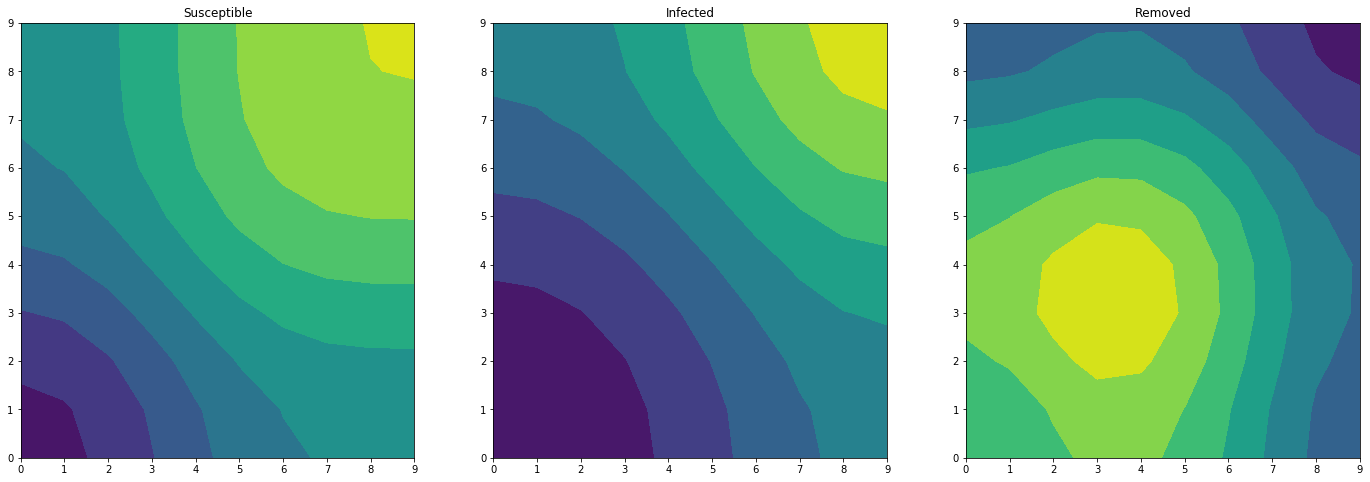

In [139]:
plot_at_t(S, I, R, 90)

In [141]:
S_sum = np.sum(S.sum(axis=1), axis=1)
I_sum = np.sum(I.sum(axis=1), axis=1)
R_sum = np.sum(R.sum(axis=1), axis=1)

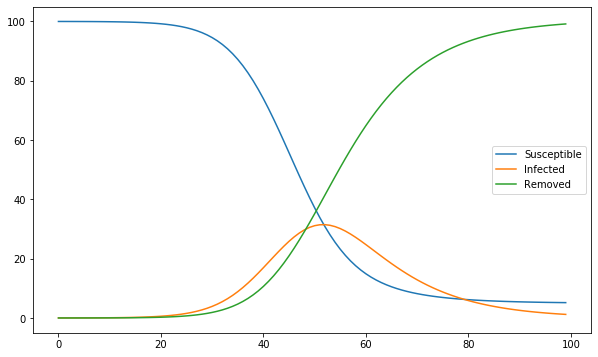

In [142]:
plt.figure(figsize=(10,6))
plt.plot(S_sum, label = 'Susceptible')
plt.plot(I_sum, label = 'Infected')
plt.plot(R_sum, label = 'Removed')
plt.legend()
plt.show()